## Calculate differences in transcript expression peaks

In [1]:
%run ../utilities/peakFinding.py
%run ../utilities/heatmap.py

### Filter for transcripts with >5 TPM at any time point for each strain

In [4]:
ts = pd.read_csv("../Data/salmon/Time_Series/Read_Counts/TPMs.csv").rename(columns = {'Unnamed: 0':'ORF'}).set_index('ORF')
tsMeans = pd.read_csv("../Data/salmon/Time_Series/Read_Counts/TPMs_rep_means.csv").rename(columns = {'Unnamed: 0':'ORF'}).set_index('ORF')

annos = pd.read_csv("../Data/Annotations/PFD3D7_annos.csv", index_col="ORF").drop("Unnamed: 0", axis = 1)

ts_3D7 = ts.iloc[:,:64].copy()
ts_FUP = ts.iloc[:,64:128].copy()
tsMeans_3D7 = tsMeans.iloc[:,:32]
tsMeans_FUP = tsMeans.iloc[:,32:64]

minTPMs = 5

ts_3D7 = ts_3D7[(ts_3D7 > minTPMs).any(1)]
ts_FUP = ts_FUP[(ts_FUP > minTPMs).any(1)]

time_points = list(range(3, 51, 3))

### Set analysis: all transcripts or transcripts with a single peak 

In [5]:
# analysis = "All"
analysis = "Mono"

In [6]:
print("Number of transcripts in 3D7 time series > {} TPM at any time point: ".format(minTPMs), len(ts_3D7.index.tolist()))
print("Number of transcripts in FUP time series > {} TPM at any time point: ".format(minTPMs), len(ts_FUP.index.tolist()))

Number of transcripts in 3D7 time series > 5 TPM at any time point:  4842
Number of transcripts in FUP time series > 5 TPM at any time point:  4657


In [7]:
df_AA13_3D7 = getIsolate(ts_3D7, ("AA13.*3D7"))
df_AA17_3D7 = getIsolate(ts_3D7, ("AA17.*3D7"))
df_AS15_3D7 = getIsolate(ts_3D7, ("AS15.*3D7"))
df_AS16_3D7 = getIsolate(ts_3D7, ("AS16.*3D7"))
df_AA13_FUP = getIsolate(ts_FUP, ("AA13.*FUP"))
df_AA17_FUP = getIsolate(ts_FUP, ("AA17.*FUP"))
df_AS18_FUP = getIsolate(ts_FUP, ("AS18.*FUP"))
df_AS19_FUP = getIsolate(ts_FUP, ("AS19.*FUP"))

dfAA_3D7 =getIsolate(tsMeans_3D7, ("AA.*3D7"))
dfAS_3D7 =getIsolate(tsMeans_3D7, ("AS.*3D7"))
dfAA_FUP =getIsolate(tsMeans_FUP, ("AA.*FUP"))
dfAS_FUP =getIsolate(tsMeans_FUP, ("AS.*FUP"))

### Identify transcripts in HbAA replicates with a single peak

In [8]:
orfPeaksAA13_3D7 = onePeakGenes(df_AA13_3D7, None, None, 1, None)
orfPeaksAA17_3D7 = onePeakGenes(df_AA17_3D7, None, None, 1, None)
orf_peaks_3D7 = list(set(orfPeaksAA13_3D7).intersection(set(orfPeaksAA17_3D7)))
print("No. of transcripts with one peak in HbAA13 3D7: ",len(orfPeaksAA13_3D7))
print("No. of transcripts with one peak in HbAA17 3D7: ",len(orfPeaksAA17_3D7))
print("No. of transcripts with one peak in HbAA 3D7: ",len(orf_peaks_3D7))

orfPeaksAA13_FUP = onePeakGenes(df_AA13_FUP, None, None, 1, None)
orfPeaksAA17_FUP = onePeakGenes(df_AA17_FUP, None, None, 1, None)
orf_peaks_FUP = list(set(orfPeaksAA13_FUP).intersection(set(orfPeaksAA17_FUP)))
print("No. of transcripts with one peak in HbAA13 FUP: ",len(orfPeaksAA13_FUP))
print("No. of transcripts with one peak in HbAA17 FUP: ",len(orfPeaksAA17_FUP))
print("No. of transcripts with one peak in HbAA FUP: ",len(orf_peaks_FUP))

No. of transcripts with one peak in HbAA13 3D7:  1838
No. of transcripts with one peak in HbAA17 3D7:  1789
No. of transcripts with one peak in HbAA 3D7:  891
No. of transcripts with one peak in HbAA13 FUP:  1678
No. of transcripts with one peak in HbAA17 FUP:  1864
No. of transcripts with one peak in HbAA FUP:  1067


### Plot heatmaps of 3D7 Hb replicates averaged TPMs

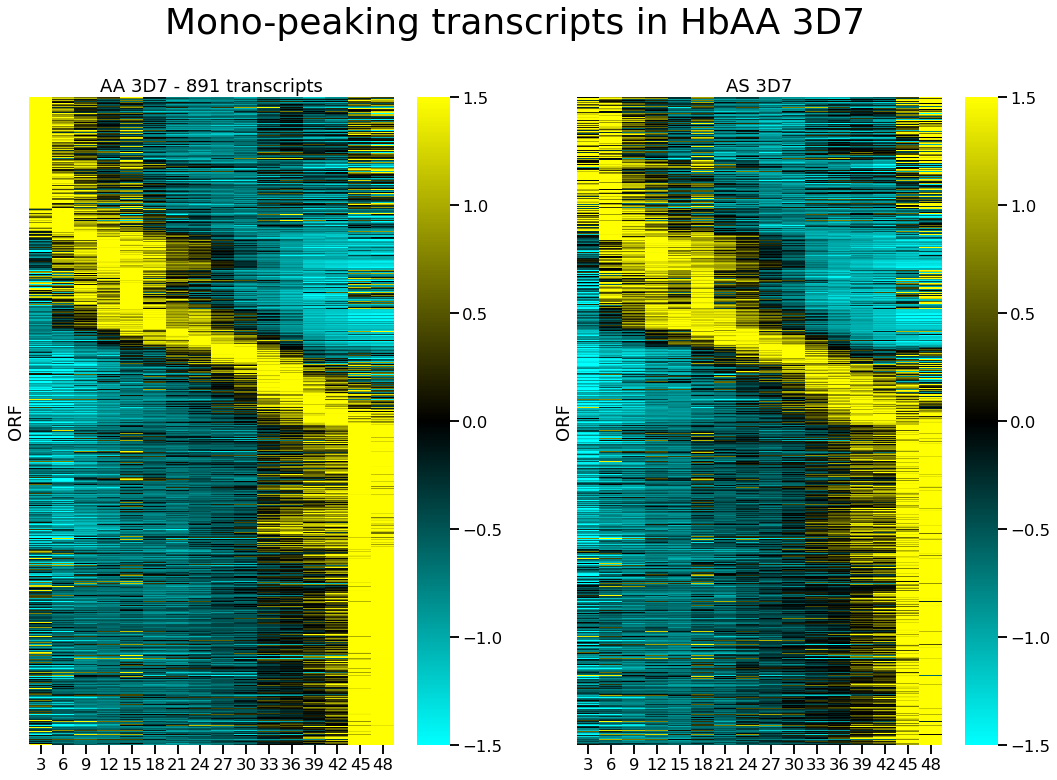

In [9]:
if (analysis == "Mono"):
    sns.set_context("talk")
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 12))
    genelist = orf_peaks_3D7
    top_N = len(genelist)
    fig.suptitle('Mono-peaking transcripts in HbAA 3D7', fontsize=36)

    aa_3d7_heat = heatmap_max(dfAA_3D7, genelist, 16, axis=ax1)
    ax1.title.set_text('AA 3D7 - {} transcripts'.format(top_N))
    as_3d7_heat = heatmap_order(dfAS_3D7, aa_3d7_heat.tolist(), axis=ax2)
    ax2.title.set_text('AS 3D7'.format(top_N))

    plt.subplots_adjust(top=0.875)
    plt.show()

### Plot heatmaps of 3D7 replicates ordered by each HbAA replicate

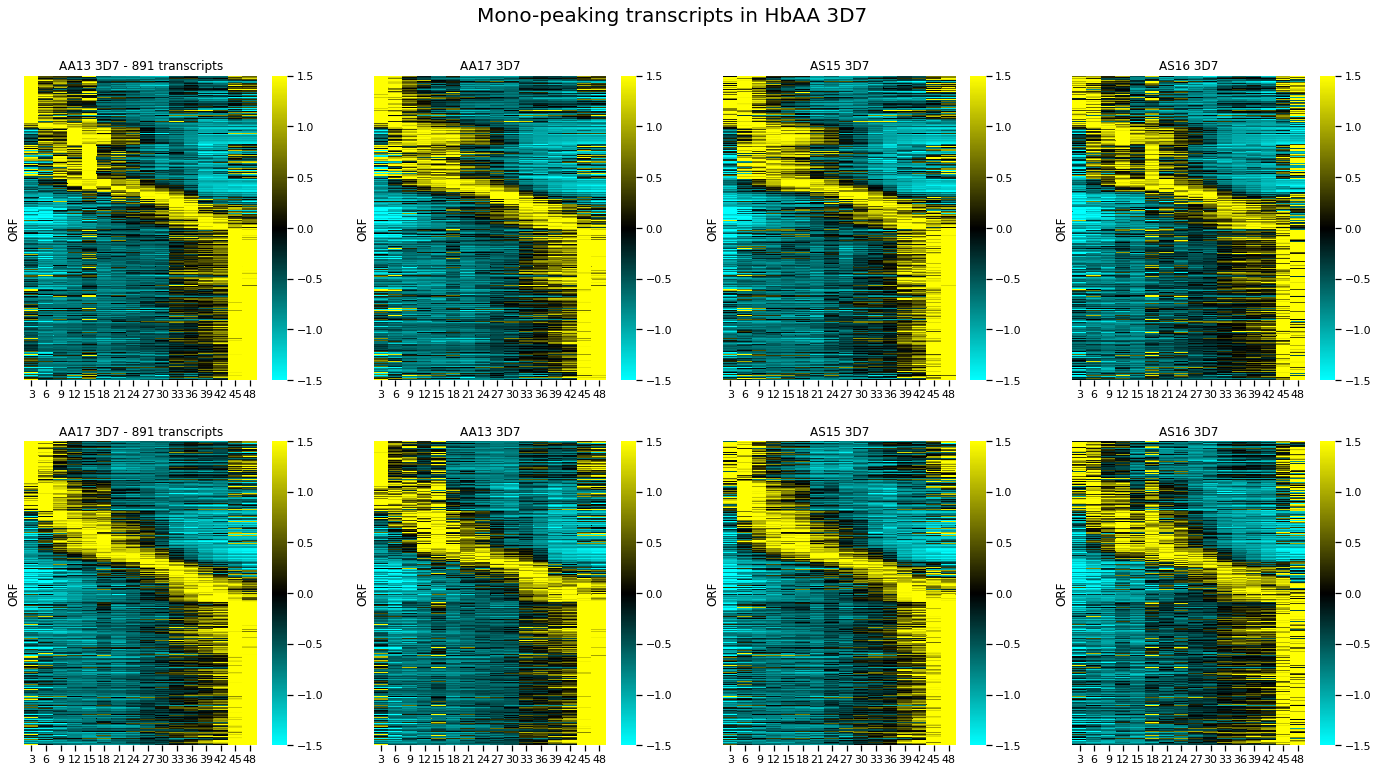

In [10]:
if (analysis == "Mono"):
    sns.set_context("notebook")
    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(ncols=4, nrows=2, figsize=(24, 12))
    genelist = orf_peaks_3D7
    top_N = len(genelist)
    fig.suptitle('Mono-peaking transcripts in HbAA 3D7', fontsize=20)

    aa13_3d7_heat = heatmap_max(df_AA13_3D7, genelist, 16, axis=ax1)
    ax1.title.set_text('AA13 3D7 - {} transcripts'.format(top_N))
    aa17_3d7_heat = heatmap_order(df_AA17_3D7, aa13_3d7_heat.tolist(), axis=ax2)
    ax2.title.set_text('AA17 3D7'.format(top_N))
    as15_3d7_heat = heatmap_order(df_AS15_3D7, aa13_3d7_heat.tolist(), axis=ax3)
    ax3.title.set_text('AS15 3D7'.format(top_N))
    as16_3d7_heat = heatmap_order(df_AS16_3D7, aa13_3d7_heat.tolist(), axis=ax4)
    ax4.title.set_text('AS16 3D7'.format(top_N))

    aa17_3d7_heat = heatmap_max(df_AA17_3D7, genelist, 16, axis=ax5)
    ax5.title.set_text('AA17 3D7 - {} transcripts'.format(top_N))
    aa13_3d7_heat = heatmap_order(df_AA13_3D7, aa17_3d7_heat.tolist(), axis=ax6)
    ax6.title.set_text('AA13 3D7'.format(top_N))
    as15_3d7_heat = heatmap_order(df_AS15_3D7, aa17_3d7_heat.tolist(), axis=ax7)
    ax7.title.set_text('AS15 3D7'.format(top_N))
    as16_3d7_heat = heatmap_order(df_AS16_3D7, aa17_3d7_heat.tolist(), axis=ax8)
    ax8.title.set_text('AS16 3D7'.format(top_N))

    plt.subplots_adjust(top=0.9)

### Plot heatmaps of FUP Hb replicates averaged TPMs

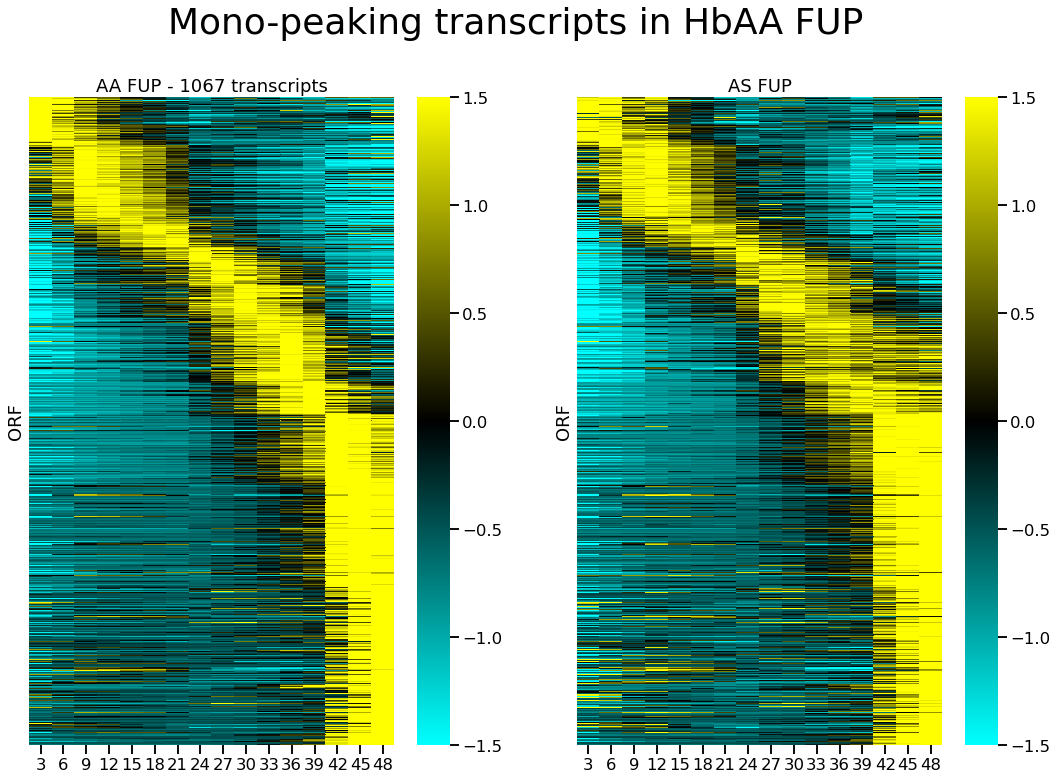

In [11]:
if (analysis == "Mono"):
    sns.set_context("talk")
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 12))
    genelist = orf_peaks_FUP
    top_N = len(genelist)
    fig.suptitle('Mono-peaking transcripts in HbAA FUP', fontsize=36)

    aa_fup_heat = heatmap_max(dfAA_FUP, genelist, 16, axis=ax1)
    ax1.title.set_text('AA FUP - {} transcripts'.format(top_N))
    as_fup_heat = heatmap_order(dfAS_FUP, aa_fup_heat.tolist(), axis=ax2)
    ax2.title.set_text('AS FUP'.format(top_N))

    plt.subplots_adjust(top=0.875)

### Plot heatmaps of FUP replicates ordered by each HbAA replicate

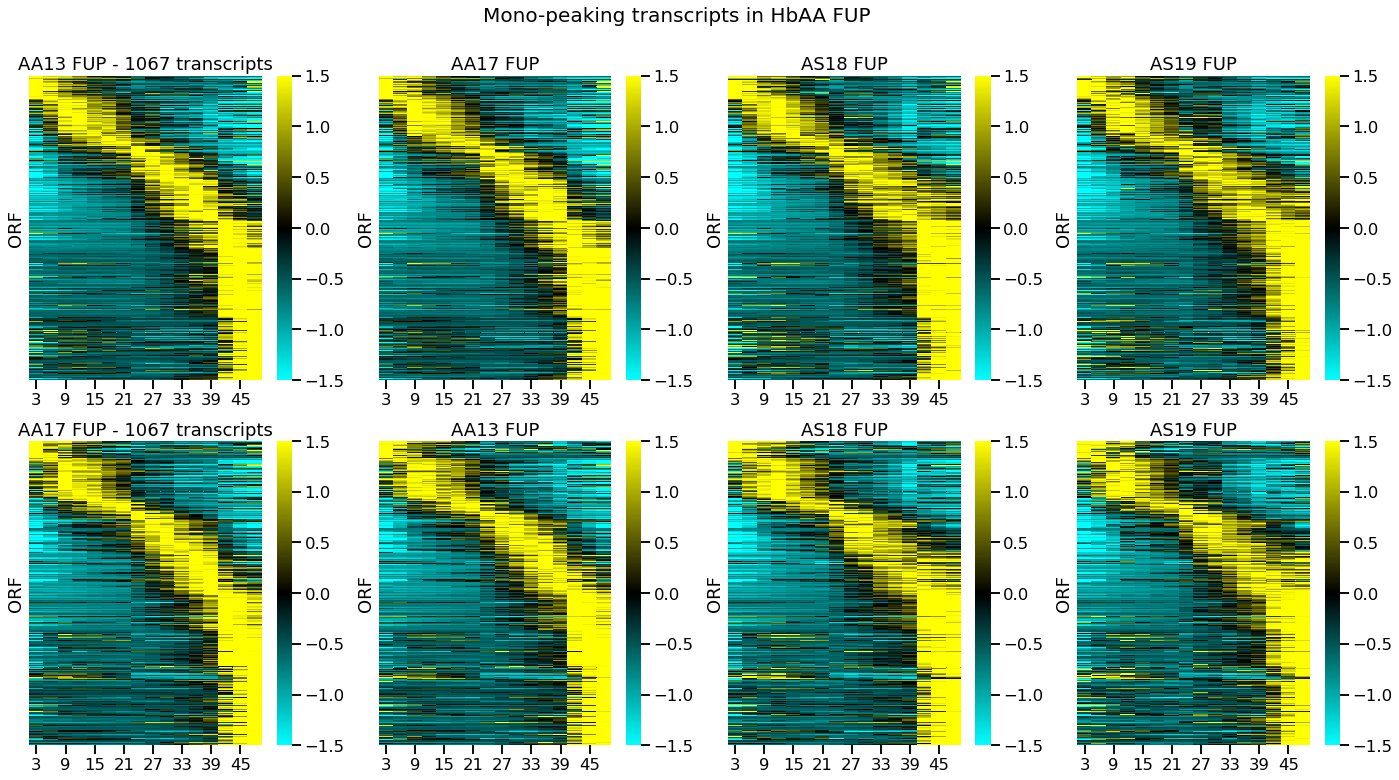

In [12]:
if (analysis == "Mono"):
    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(ncols=4, nrows=2, figsize=(24, 12))
    genelist = orf_peaks_FUP
    top_N = len(genelist)
    fig.suptitle('Mono-peaking transcripts in HbAA FUP', fontsize=20)

    aa13_heat = heatmap_max(df_AA13_FUP, genelist, 16, axis=ax1)
    ax1.title.set_text('AA13 FUP - {} transcripts'.format(top_N))
    aa17_heat = heatmap_order(df_AA17_FUP, aa13_heat.tolist(), axis=ax2)
    ax2.title.set_text('AA17 FUP'.format(top_N))
    as18_heat = heatmap_order(df_AS18_FUP, aa13_heat.tolist(), axis=ax3)
    ax3.title.set_text('AS18 FUP'.format(top_N))
    as19_heat = heatmap_order(df_AS19_FUP, aa13_heat.tolist(), axis=ax4)
    ax4.title.set_text('AS19 FUP'.format(top_N))

    aa17_heat = heatmap_max(df_AA17_FUP, genelist, 16, axis=ax5)
    ax5.title.set_text('AA17 FUP - {} transcripts'.format(top_N))
    aa13_heat = heatmap_order(df_AA13_FUP, aa17_heat.tolist(), axis=ax6)
    ax6.title.set_text('AA13 FUP'.format(top_N))
    as18_heat = heatmap_order(df_AS18_FUP, aa17_heat.tolist(), axis=ax7)
    ax7.title.set_text('AS18 FUP'.format(top_N))
    as19_heat = heatmap_order(df_AS19_FUP, aa17_heat.tolist(), axis=ax8)
    ax8.title.set_text('AS19 FUP'.format(top_N))
    plt.subplots_adjust(top=0.9)

    plt.subplots_adjust(top=0.9)

### Organize dataframes to calculate peak shifts for each pairwise comparison

In [13]:
if (analysis == "All"):
# 3D7 dataframes
    max_df_AA13vAA17_3D7 = make_peak_df(ts_3D7, '(AA13.*3D7)', 'AA13_3D7', '(AA17.*3D7)', 'AA17_3D7', time_points)
    max_df_AA13vAS15_3D7 = make_peak_df(ts_3D7, '(AA13.*3D7)', 'AA13_3D7', '(AS15.*3D7)', 'AS15_3D7', time_points)
    max_df_AA13vAS16_3D7 = make_peak_df(ts_3D7, '(AA13.*3D7)', 'AA13_3D7', '(AS16.*3D7)', 'AS16_3D7', time_points)
    max_df_AA17vAA13_3D7 = make_peak_df(ts_3D7, '(AA17.*3D7)', 'AA17_3D7', '(AA13.*3D7)', 'AA13_3D7', time_points)
    max_df_AA17vAS15_3D7 = make_peak_df(ts_3D7, '(AA17.*3D7)', 'AA17_3D7', '(AS15.*3D7)', 'AS15_3D7', time_points)
    max_df_AA17vAS16_3D7 = make_peak_df(ts_3D7, '(AA17.*3D7)', 'AA17_3D7', '(AS16.*3D7)', 'AS16_3D7', time_points)
    max_df_AS15vAS16_3D7 = make_peak_df(ts_3D7, '(AS15.*3D7)', 'AS15_3D7', '(AS16.*3D7)', 'AS16_3D7', time_points)
    max_df_AAvAS_3D7 = make_peak_df(tsMeans_3D7, '(AA.*3D7)', 'AA_3D7', '(AS.*3D7)', 'AS_3D7', time_points)


# FUP dataframes
    max_df_AA13vAA17_FUP = make_peak_df(ts_FUP, '(AA13.*FUP)', 'AA13_FUP', '(AA17.*FUP)', 'AA17_FUP', time_points)
    max_df_AA13vAS18_FUP = make_peak_df(ts_FUP, '(AA13.*FUP)', 'AA13_FUP', '(AS18.*FUP)', 'AS18_FUP', time_points)
    max_df_AA13vAS19_FUP = make_peak_df(ts_FUP, '(AA13.*FUP)', 'AA13_FUP', '(AS19.*FUP)', 'AS19_FUP', time_points)
    max_df_AA17vAA13_FUP = make_peak_df(ts_FUP, '(AA17.*FUP)', 'AA17_FUP', '(AA13.*FUP)', 'AA13_FUP', time_points)
    max_df_AA17vAS18_FUP = make_peak_df(ts_FUP, '(AA17.*FUP)', 'AA17_FUP', '(AS18.*FUP)', 'AS18_FUP', time_points)
    max_df_AA17vAS19_FUP = make_peak_df(ts_FUP, '(AA17.*FUP)', 'AA17_FUP', '(AS19.*FUP)', 'AS19_FUP', time_points)
    max_df_AS18vAS19_FUP = make_peak_df(ts_FUP, '(AS18.*FUP)', 'AS18_FUP', '(AS19.*FUP)', 'AS19_FUP', time_points)
    max_df_AAvAS_FUP = make_peak_df(tsMeans_FUP, '(AA.*FUP)', 'AA_FUP', '(AS.*FUP)', 'AS_FUP', time_points)

if (analysis == "Mono"):
# 3D7 dataframes
    max_df_AA13vAA17_3D7 = make_peak_df(ts_3D7.loc[orf_peaks_3D7], '(AA13.*3D7)', 'AA13_3D7', '(AA17.*3D7)', 'AA17_3D7', time_points)
    max_df_AA17vAA13_3D7 = make_peak_df(ts_3D7.loc[orf_peaks_3D7], '(AA17.*3D7)', 'AA17_3D7', '(AA13.*3D7)', 'AA13_3D7', time_points)
    max_df_AA13vAS15_3D7 = make_peak_df(ts_3D7.loc[orf_peaks_3D7], '(AA13.*3D7)', 'AA13_3D7', '(AS15.*3D7)', 'AS15_3D7', time_points)
    max_df_AA13vAS16_3D7 = make_peak_df(ts_3D7.loc[orf_peaks_3D7], '(AA13.*3D7)', 'AA13_3D7', '(AS16.*3D7)', 'AS16_3D7', time_points)
    max_df_AA17vAS15_3D7 = make_peak_df(ts_3D7.loc[orf_peaks_3D7], '(AA17.*3D7)', 'AA17_3D7', '(AS15.*3D7)', 'AS15_3D7', time_points)
    max_df_AA17vAS16_3D7 = make_peak_df(ts_3D7.loc[orf_peaks_3D7], '(AA17.*3D7)', 'AA17_3D7', '(AS16.*3D7)', 'AS16_3D7', time_points)
    max_df_AS15vAS16_3D7 = make_peak_df(ts_3D7.loc[orf_peaks_3D7], '(AS15.*3D7)', 'AS15_3D7', '(AS16.*3D7)', 'AS16_3D7', time_points)
    max_df_AAvAS_3D7 = make_peak_df(tsMeans_3D7.loc[orf_peaks_3D7], '(AA.*3D7)', 'AA_3D7', '(AS.*3D7)', 'AS_3D7', time_points)

# FUP dataframes
    max_df_AA13vAA17_FUP = make_peak_df(ts_FUP.loc[orf_peaks_FUP], '(AA13.*FUP)', 'AA13_FUP', '(AA17.*FUP)', 'AA17_FUP', time_points)
    max_df_AA17vAA13_FUP = make_peak_df(ts_FUP.loc[orf_peaks_FUP], '(AA17.*FUP)', 'AA17_FUP', '(AA13.*FUP)', 'AA13_FUP', time_points)
    max_df_AA13vAS18_FUP = make_peak_df(ts_FUP.loc[orf_peaks_FUP], '(AA13.*FUP)', 'AA13_FUP', '(AS18.*FUP)', 'AS18_FUP', time_points)
    max_df_AA13vAS19_FUP = make_peak_df(ts_FUP.loc[orf_peaks_FUP], '(AA13.*FUP)', 'AA13_FUP', '(AS19.*FUP)', 'AS19_FUP', time_points)
    max_df_AA17vAS18_FUP = make_peak_df(ts_FUP.loc[orf_peaks_FUP], '(AA17.*FUP)', 'AA17_FUP', '(AS18.*FUP)', 'AS18_FUP', time_points)
    max_df_AA17vAS19_FUP = make_peak_df(ts_FUP.loc[orf_peaks_FUP], '(AA17.*FUP)', 'AA17_FUP', '(AS19.*FUP)', 'AS19_FUP', time_points)
    max_df_AS18vAS19_FUP = make_peak_df(ts_FUP.loc[orf_peaks_FUP], '(AS18.*FUP)', 'AS18_FUP', '(AS19.*FUP)', 'AS19_FUP', time_points)
    max_df_AAvAS_FUP = make_peak_df(tsMeans_FUP.loc[orf_peaks_FUP], '(AA.*FUP)', 'AA_FUP', '(AS.*FUP)', 'AS_FUP', time_points)

### Calculate peak shifts for each pairwise comparison

In [14]:
## 3D7
max_df_AA13vAA17_3D7, max_df_AA13vAA17_3D7_pct = calc_peak_change(max_df_AA13vAA17_3D7, 'AA13_3D7', 'AA17_3D7')
max_df_AA17vAA13_3D7, max_df_AA17vAA13_3D7_pct = calc_peak_change(max_df_AA17vAA13_3D7, 'AA17_3D7', 'AA13_3D7')
max_df_AA13vAS15_3D7, max_df_AA13vAS15_3D7_pct = calc_peak_change(max_df_AA13vAS15_3D7, 'AA13_3D7', 'AS15_3D7')
max_df_AA13vAS16_3D7, max_df_AA13vAS16_3D7_pct = calc_peak_change(max_df_AA13vAS16_3D7, 'AA13_3D7', 'AS16_3D7')
max_df_AA17vAS15_3D7, max_df_AA17vAS15_3D7_pct = calc_peak_change(max_df_AA17vAS15_3D7, 'AA17_3D7', 'AS15_3D7')
max_df_AA17vAS16_3D7, max_df_AA17vAS16_3D7_pct = calc_peak_change(max_df_AA17vAS16_3D7, 'AA17_3D7', 'AS16_3D7')
max_df_AS15vAS16_3D7, max_df_AS15vAS16_3D7_pct = calc_peak_change(max_df_AS15vAS16_3D7, 'AS15_3D7', 'AS16_3D7')
max_df_AAvAS_3D7, max_df_AAvAS_3D7_pct = calc_peak_change(max_df_AAvAS_3D7, 'AA_3D7', 'AS_3D7')
## FUP
max_df_AA13vAA17_FUP, max_df_AA13vAA17_FUP_pct = calc_peak_change(max_df_AA13vAA17_FUP, 'AA13_FUP', 'AA17_FUP')
max_df_AA17vAA13_FUP, max_df_AA17vAA13_FUP_pct = calc_peak_change(max_df_AA17vAA13_FUP, 'AA17_FUP', 'AA13_FUP')
max_df_AA13vAS18_FUP, max_df_AA13vAS18_FUP_pct = calc_peak_change(max_df_AA13vAS18_FUP, 'AA13_FUP', 'AS18_FUP')
max_df_AA13vAS19_FUP, max_df_AA13vAS19_FUP_pct = calc_peak_change(max_df_AA13vAS19_FUP, 'AA13_FUP', 'AS19_FUP')
max_df_AA17vAS18_FUP, max_df_AA17vAS18_FUP_pct = calc_peak_change(max_df_AA17vAS18_FUP, 'AA17_FUP', 'AS18_FUP')
max_df_AA17vAS19_FUP, max_df_AA17vAS19_FUP_pct = calc_peak_change(max_df_AA17vAS19_FUP, 'AA17_FUP', 'AS19_FUP')
max_df_AS18vAS19_FUP, max_df_AS18vAS19_FUP_pct = calc_peak_change(max_df_AS18vAS19_FUP, 'AS18_FUP', 'AS19_FUP')
max_df_AAvAS_FUP, max_df_AAvAS_FUP_pct = calc_peak_change(max_df_AAvAS_FUP, 'AA_FUP', 'AS_FUP')

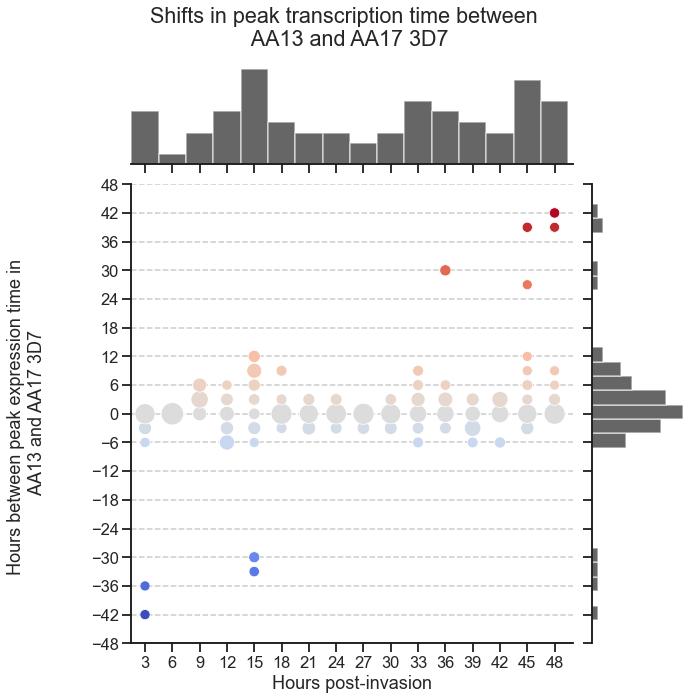

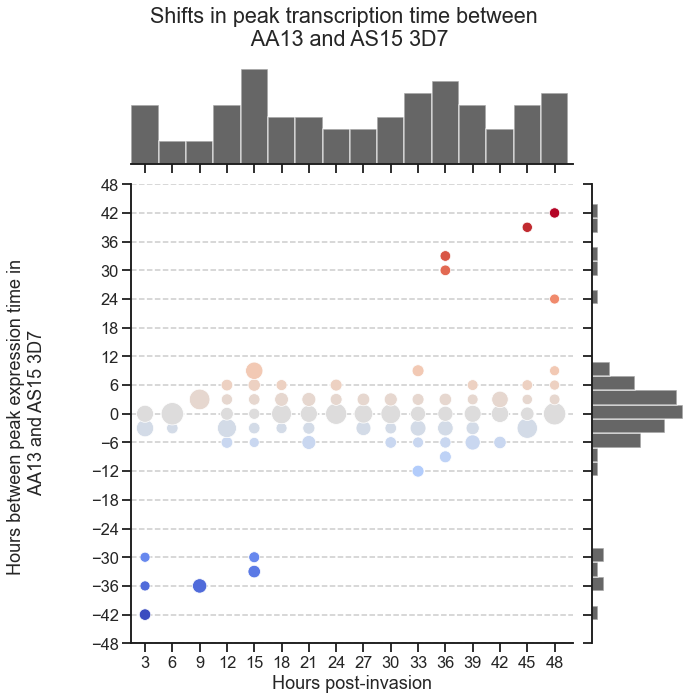

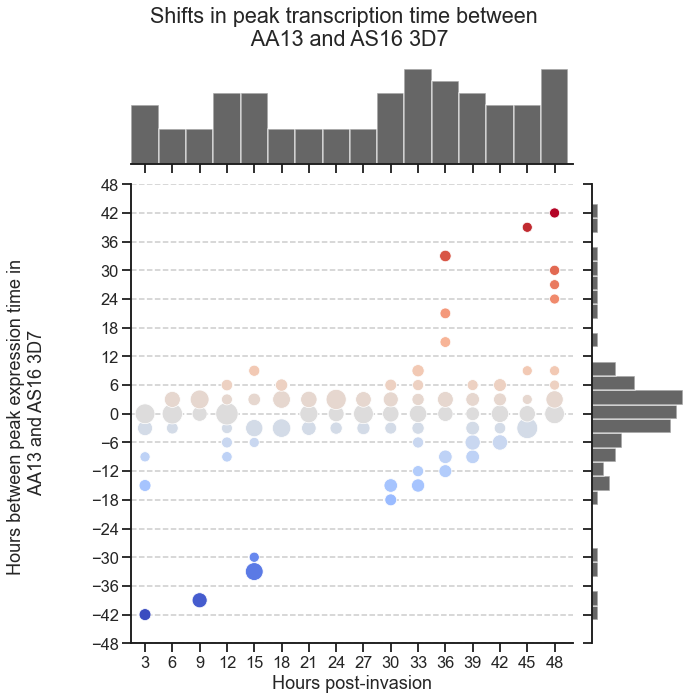

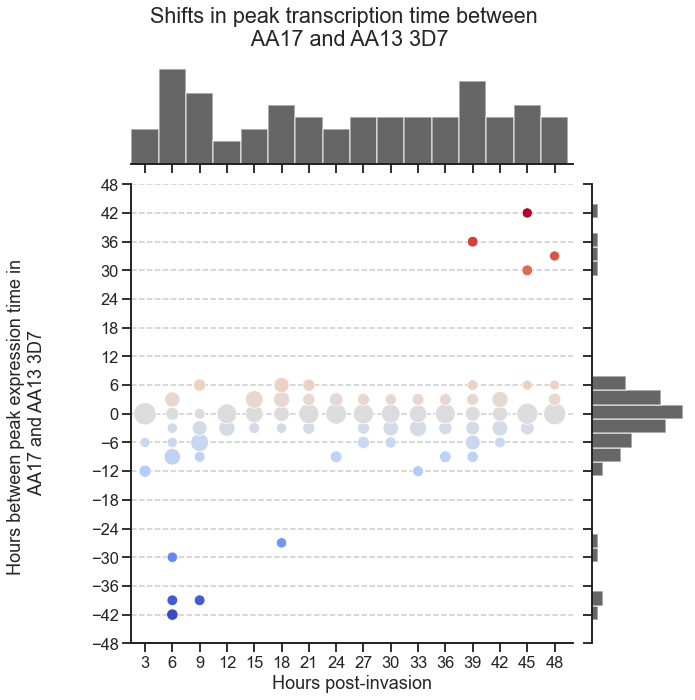

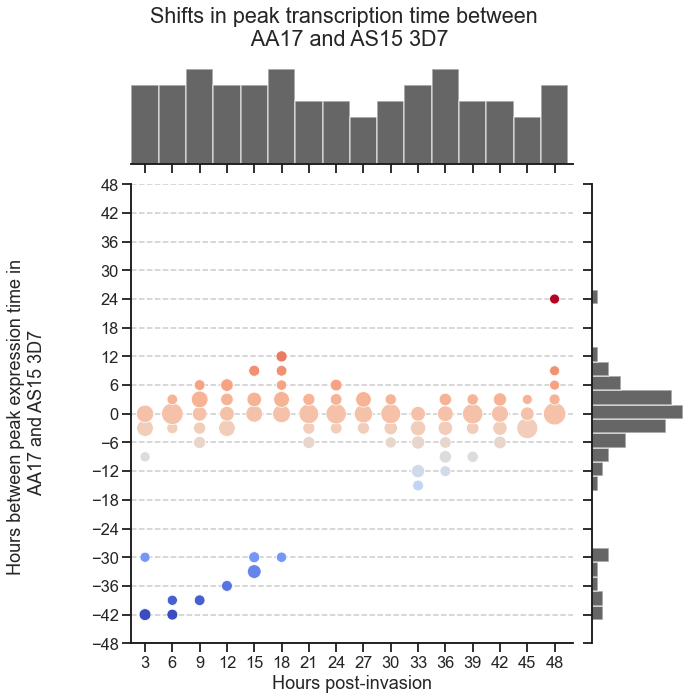

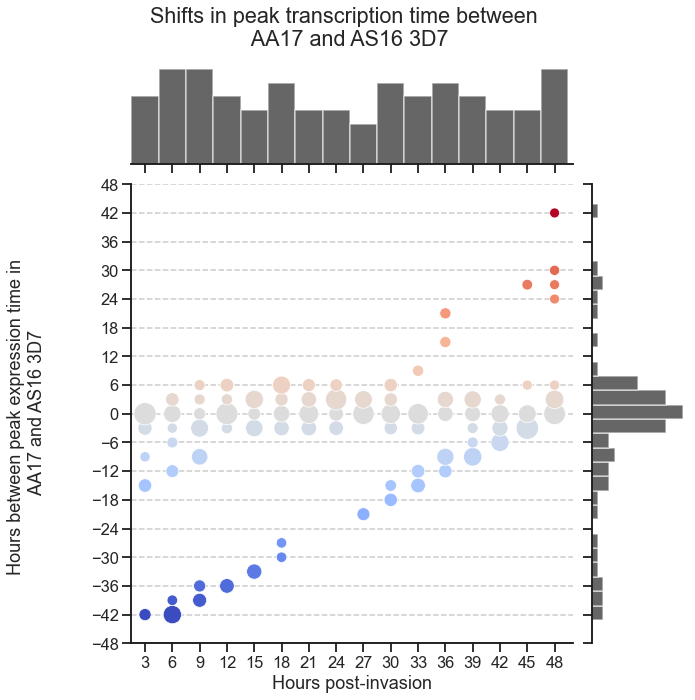

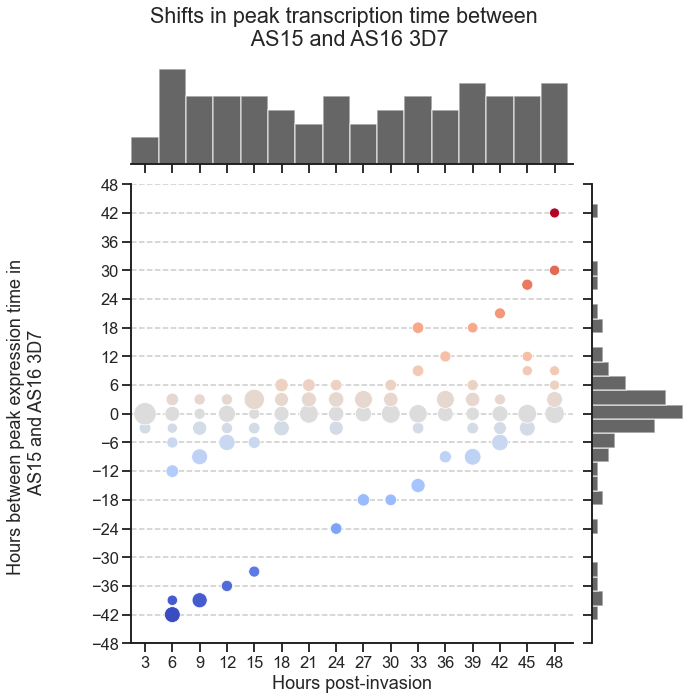

In [15]:
plot_peakShifts(max_df_AA13vAA17_3D7_pct, "AA13_3D7", "AA13 and AA17 3D7")
plot_peakShifts(max_df_AA13vAS15_3D7_pct, "AA13_3D7", "AA13 and AS15 3D7")
plot_peakShifts(max_df_AA13vAS16_3D7_pct, "AA13_3D7", "AA13 and AS16 3D7")
plot_peakShifts(max_df_AA17vAA13_3D7_pct, "AA17_3D7", "AA17 and AA13 3D7")
plot_peakShifts(max_df_AA17vAS15_3D7_pct, "AA17_3D7", "AA17 and AS15 3D7")
plot_peakShifts(max_df_AA17vAS16_3D7_pct, "AA17_3D7", "AA17 and AS16 3D7")
plot_peakShifts(max_df_AS15vAS16_3D7_pct, "AS15_3D7", "AS15 and AS16 3D7")

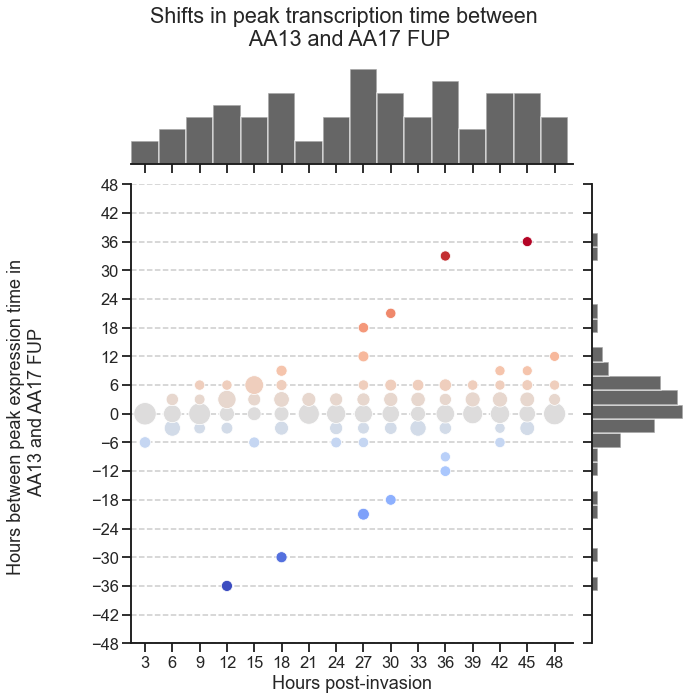

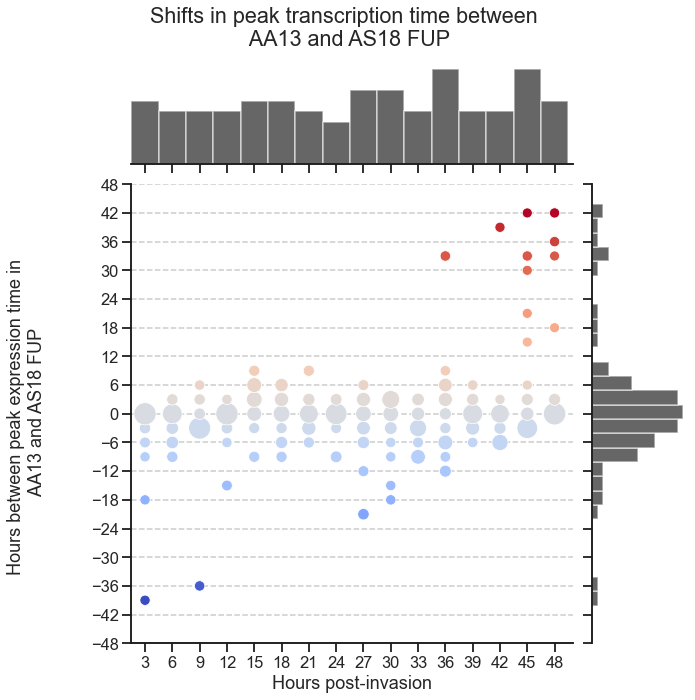

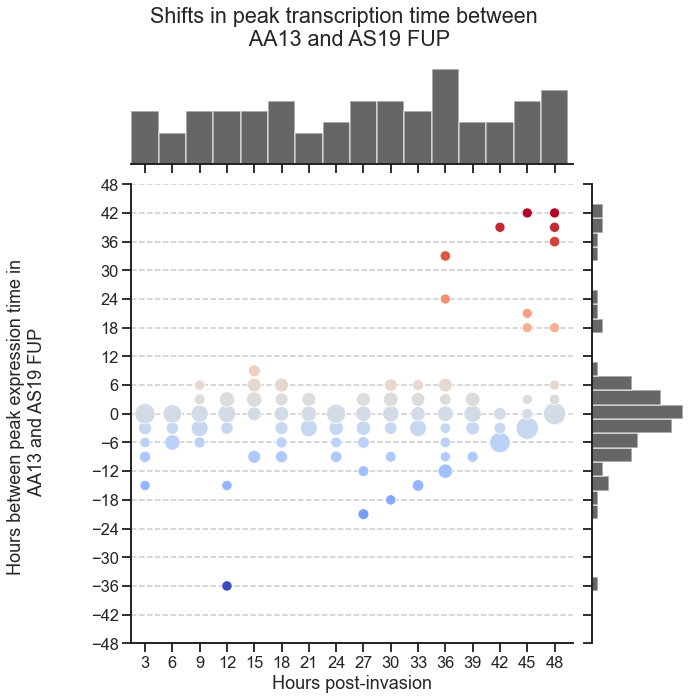

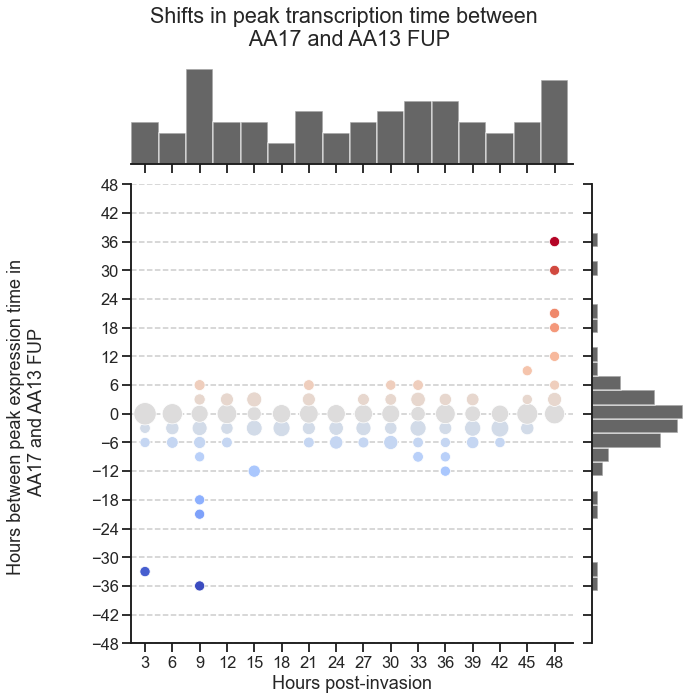

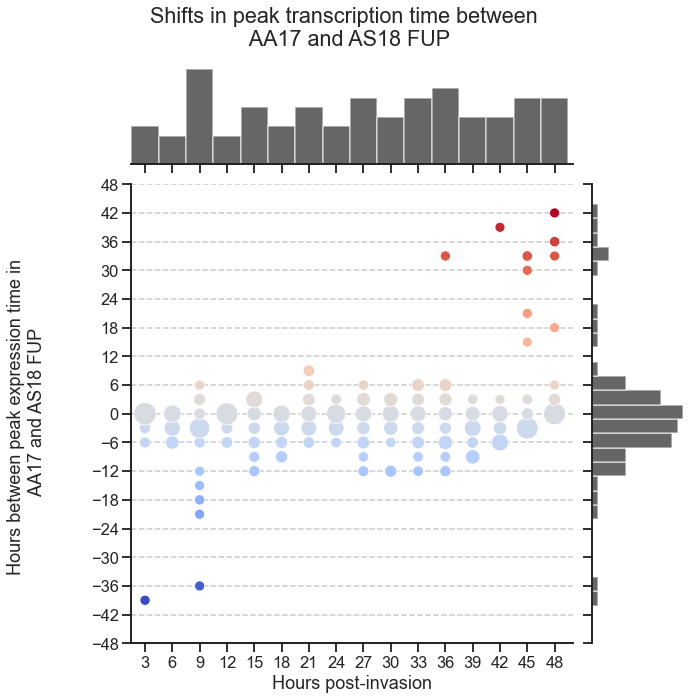

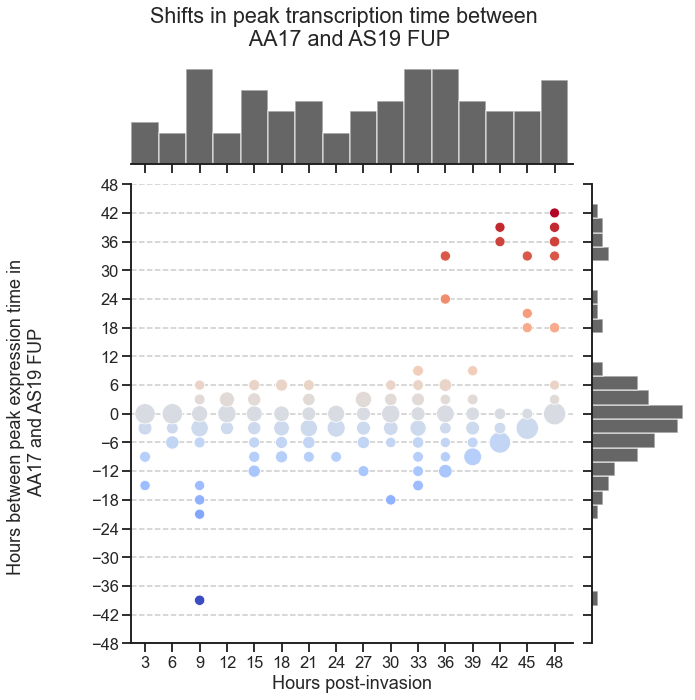

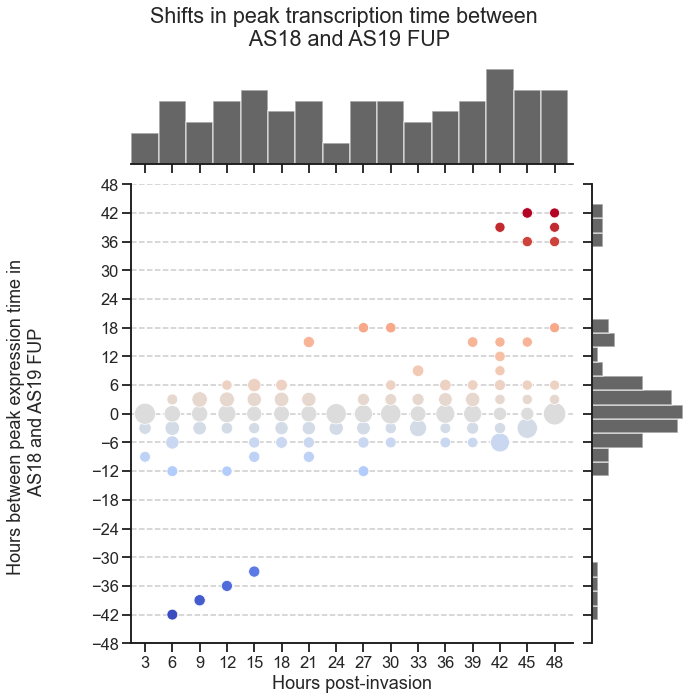

In [16]:
plot_peakShifts(max_df_AA13vAA17_FUP_pct, "AA13_FUP", "AA13 and AA17 FUP")
plot_peakShifts(max_df_AA13vAS18_FUP_pct, "AA13_FUP", "AA13 and AS18 FUP")
plot_peakShifts(max_df_AA13vAS19_FUP_pct, "AA13_FUP", "AA13 and AS19 FUP")
plot_peakShifts(max_df_AA17vAA13_FUP_pct, "AA17_FUP", "AA17 and AA13 FUP")
plot_peakShifts(max_df_AA17vAS18_FUP_pct, "AA17_FUP", "AA17 and AS18 FUP")
plot_peakShifts(max_df_AA17vAS19_FUP_pct, "AA17_FUP", "AA17 and AS19 FUP")
plot_peakShifts(max_df_AS18vAS19_FUP_pct, "AS18_FUP", "AS18 and AS19 FUP")

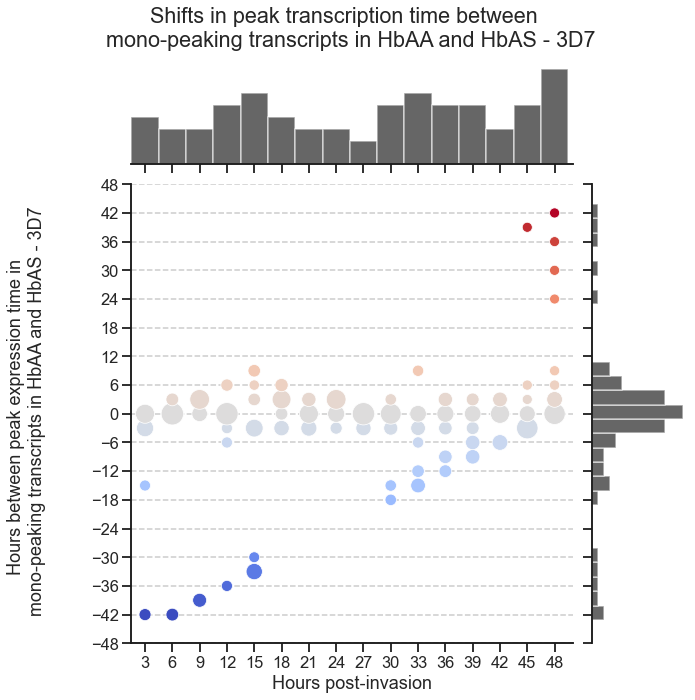

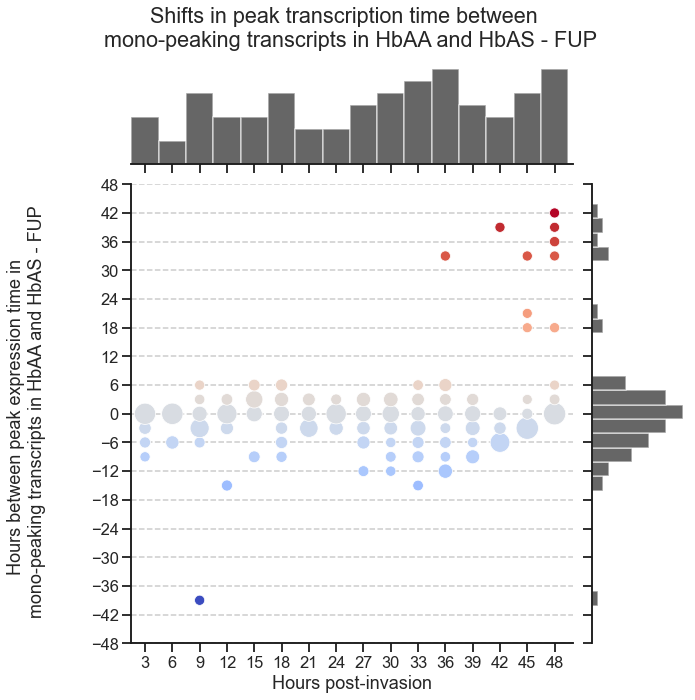

In [17]:
plot_peakShifts(max_df_AAvAS_3D7_pct, "AA_3D7", "mono-peaking transcripts in HbAA and HbAS - 3D7")

plot_peakShifts(max_df_AAvAS_FUP_pct, "AA_FUP", "mono-peaking transcripts in HbAA and HbAS - FUP")

### Organize pairwise peak shifts into one dataframe per parasite strain

In [18]:
peakShiftsAA13vAA17_3D7 = max_df_AA13vAA17_3D7.drop(['AA13_3D7', 'AA17_3D7'], axis=1).rename(columns={"peak_time_change": "AA13vAA17"})
peakShiftsAA17vAA13_3D7 = max_df_AA17vAA13_3D7.drop(['AA17_3D7', 'AA13_3D7'], axis=1).rename(columns={"peak_time_change": "AA17vAA13"})
peakShiftsAA13vAS15_3D7 = max_df_AA13vAS15_3D7.drop(['AA13_3D7', 'AS15_3D7'], axis=1).rename(columns={"peak_time_change": "AA13vAS15"})
peakShiftsAA13vAS16_3D7 = max_df_AA13vAS16_3D7.drop(['AA13_3D7', 'AS16_3D7'], axis=1).rename(columns={"peak_time_change": "AA13vAS16"})
peakShiftsAA17vAS15_3D7 = max_df_AA17vAS15_3D7.drop(['AA17_3D7', 'AS15_3D7'], axis=1).rename(columns={"peak_time_change": "AA17vAS15"})
peakShiftsAA17vAS16_3D7 = max_df_AA17vAS16_3D7.drop(['AA17_3D7', 'AS16_3D7'], axis=1).rename(columns={"peak_time_change": "AA17vAS16"})
peakShiftsAS15vAS16_3D7 = max_df_AS15vAS16_3D7.drop(['AS15_3D7', 'AS16_3D7'], axis=1).rename(columns={"peak_time_change": "AS15vAS16"})

peakShifts3D7 = peakShiftsAA13vAA17_3D7.merge(peakShiftsAA13vAS15_3D7[["AA13vAS15"]], left_index=True, right_index=True, how='inner')
peakShifts3D7 = peakShifts3D7.merge(peakShiftsAA13vAS16_3D7[["AA13vAS16"]], left_index=True, right_index=True, how='inner')
peakShifts3D7 = peakShifts3D7.merge(peakShiftsAA17vAA13_3D7[["AA17vAA13"]], left_index=True, right_index=True, how='inner')
peakShifts3D7 = peakShifts3D7.merge(peakShiftsAA17vAS15_3D7[["AA17vAS15"]], left_index=True, right_index=True, how='inner')
peakShifts3D7 = peakShifts3D7.merge(peakShiftsAA17vAS16_3D7[["AA17vAS16"]], left_index=True, right_index=True, how='inner')
peakShifts3D7['AAvAS_mean'] = peakShifts3D7[['AA13vAS15', 'AA13vAS16', 'AA17vAS15', 'AA17vAS16']].mean(axis=1)

peakShiftsAA13vAA17_FUP = max_df_AA13vAA17_FUP.drop(['AA13_FUP', 'AA17_FUP'], axis=1).rename(columns={"peak_time_change": "AA13vAA17"})
peakShiftsAA17vAA13_FUP = max_df_AA17vAA13_FUP.drop(['AA17_FUP', 'AA13_FUP'], axis=1).rename(columns={"peak_time_change": "AA17vAA13"})
peakShiftsAA13vAS18_FUP = max_df_AA13vAS18_FUP.drop(['AA13_FUP', 'AS18_FUP'], axis=1).rename(columns={"peak_time_change": "AA13vAS18"})
peakShiftsAA13vAS19_FUP = max_df_AA13vAS19_FUP.drop(['AA13_FUP', 'AS19_FUP'], axis=1).rename(columns={"peak_time_change": "AA13vAS19"})
peakShiftsAA17vAS18_FUP = max_df_AA17vAS18_FUP.drop(['AA17_FUP', 'AS18_FUP'], axis=1).rename(columns={"peak_time_change": "AA17vAS18"})
peakShiftsAA17vAS19_FUP = max_df_AA17vAS19_FUP.drop(['AA17_FUP', 'AS19_FUP'], axis=1).rename(columns={"peak_time_change": "AA17vAS19"})
peakShiftsAS18vAS19_FUP = max_df_AS18vAS19_FUP.drop(['AS18_FUP', 'AS19_FUP'], axis=1).rename(columns={"peak_time_change": "AS18vAS19"})

peakShiftsFUP = peakShiftsAA13vAA17_FUP.merge(peakShiftsAA13vAS18_FUP[["AA13vAS18"]], left_index=True, right_index=True, how='inner')
peakShiftsFUP = peakShiftsFUP.merge(peakShiftsAA13vAS19_FUP[["AA13vAS19"]], left_index=True, right_index=True, how='inner')
peakShiftsFUP = peakShiftsFUP.merge(peakShiftsAA17vAA13_FUP[["AA17vAA13"]], left_index=True, right_index=True, how='inner')
peakShiftsFUP = peakShiftsFUP.merge(peakShiftsAA17vAS18_FUP[["AA17vAS18"]], left_index=True, right_index=True, how='inner')
peakShiftsFUP = peakShiftsFUP.merge(peakShiftsAA17vAS19_FUP[["AA17vAS19"]], left_index=True, right_index=True, how='inner')
peakShiftsFUP['AAvAS_mean'] = peakShiftsFUP[['AA13vAS18', 'AA13vAS19', 'AA17vAS18', 'AA17vAS19']].mean(axis=1)

/Users/joe/miniconda3/envs/main/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/Users/joe/miniconda3/envs/main/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


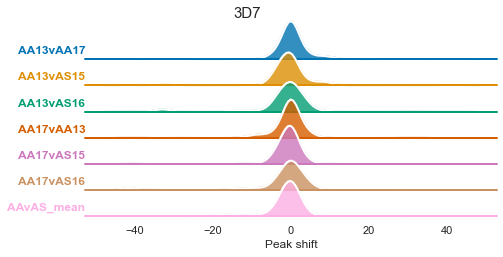

In [19]:
df_3D7 = peakShifts3D7.reset_index()
df_3D7 = df_3D7.melt(id_vars=['ORF'] , var_name='Comparison', value_name='peakShift')
g = ridgeplot(df_3D7, "3D7")

/Users/joe/miniconda3/envs/main/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/Users/joe/miniconda3/envs/main/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


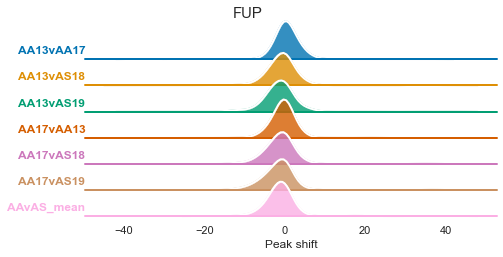

In [20]:
df_FUP = peakShiftsFUP.reset_index()
df_FUP = df_FUP.melt(id_vars=['ORF'] , var_name='Comparison', value_name='peakShift')
g = ridgeplot(df_FUP, "FUP")

In [21]:
# Prepare 3D7 data
data_3D7_AA13vAA17 = max_df_AA13vAA17_3D7['peak_time_change'].to_numpy()
data_3D7_AA13vAS15 = max_df_AA13vAS15_3D7['peak_time_change'].to_numpy()
data_3D7_AA13vAS16 = max_df_AA13vAS16_3D7['peak_time_change'].to_numpy()
data_3D7_AA17vAA13 = max_df_AA17vAA13_3D7['peak_time_change'].to_numpy()
data_3D7_AA17vAS15 = max_df_AA17vAS15_3D7['peak_time_change'].to_numpy()
data_3D7_AA17vAS16 = max_df_AA17vAS16_3D7['peak_time_change'].to_numpy()
data_3D7_AS15vAS16 = max_df_AS15vAS16_3D7['peak_time_change'].to_numpy()
data_3D7_ASvAA = peakShifts3D7['AAvAS_mean'].to_numpy()

# Prepare FUP data
data_FUP_AA13vAA17 = max_df_AA13vAA17_FUP['peak_time_change'].to_numpy()
data_FUP_AA13vAS18 = max_df_AA13vAS18_FUP['peak_time_change'].to_numpy()
data_FUP_AA13vAS19 = max_df_AA13vAS19_FUP['peak_time_change'].to_numpy()
data_FUP_AA17vAA13 = max_df_AA17vAA13_FUP['peak_time_change'].to_numpy()
data_FUP_AA17vAS18 = max_df_AA17vAS18_FUP['peak_time_change'].to_numpy()
data_FUP_AA17vAS19 = max_df_AA17vAS19_FUP['peak_time_change'].to_numpy()
data_FUP_AS18vAS19 = max_df_AS18vAS19_FUP['peak_time_change'].to_numpy()
data_FUP_ASvAA = peakShiftsFUP['AAvAS_mean'].to_numpy()

### Descriptive statistics of peak shifts in 3D7

In [22]:
peakShifts3D7.describe()

,AA13vAA17,AA13vAS15,AA13vAS16,AA17vAA13,AA17vAS15,AA17vAS16,AAvAS_mean
count,830.00000,830.000000,830.000000,830.00000,830.000000,830.000000,830.000000
mean,0.73012,-0.650602,-1.868675,-0.73012,-1.380723,-2.598795,-1.624699
std,6.48256,7.974074,9.233382,6.48256,6.114873,10.596185,6.381266
min,-33.00000,-42.000000,-42.000000,-42.00000,-42.000000,-42.000000,-42.000000
25%,0.00000,-3.000000,-3.000000,0.00000,-3.000000,-3.000000,-1.500000
50%,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.125000
max,42.00000,42.000000,42.000000,33.00000,24.000000,42.000000,24.000000


### Descriptive statistics of peak shifts in FUP

In [23]:
peakShiftsFUP.describe()

,AA13vAA17,AA13vAS18,AA13vAS19,AA17vAA13,AA17vAS18,AA17vAS19,AAvAS_mean
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.359195,-0.508621,-0.942529,-0.359195,-0.867816,-1.301724,-0.905172
std,3.971652,5.948720,5.964625,3.971652,6.202693,6.529229,5.172815
min,-36.000000,-39.000000,-36.000000,-36.000000,-39.000000,-39.000000,-19.500000
25%,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36.000000,42.000000,42.000000,36.000000,42.000000,42.000000,42.000000


### Test for Gaussian distribution of 3D7 peak shifts

In [24]:
testNormality(data_3D7_AA13vAA17, "3D7 HbAA13vHbAA17 peak time shifts")
testNormality(data_3D7_AA13vAS15, "3D7 HbAA13vHbAS15 peak time shifts")
testNormality(data_3D7_AA13vAS16, "3D7 HbAA13vHbAS16 peak time shifts")
testNormality(data_3D7_AA17vAA13, "3D7 HbAA17vHbAA13 peak time shifts")
testNormality(data_3D7_AA17vAS15, "3D7 HbAA17vHbAS15 peak time shifts")
testNormality(data_3D7_AA17vAS16, "3D7 HbAA17vHbAS16 peak time shifts")
testNormality(data_3D7_AS15vAS16, "3D7 HbAS15vHbAS16 peak time shifts")

Data: 3D7 HbAA13vHbAA17 peak time shifts
Statistics=341.179, p=0.000
3D7 HbAA13vHbAA17 peak time shifts do not look Gaussian (reject H0)

Data: 3D7 HbAA13vHbAS15 peak time shifts
Statistics=324.240, p=0.000
3D7 HbAA13vHbAS15 peak time shifts do not look Gaussian (reject H0)

Data: 3D7 HbAA13vHbAS16 peak time shifts
Statistics=335.977, p=0.000
3D7 HbAA13vHbAS16 peak time shifts do not look Gaussian (reject H0)

Data: 3D7 HbAA17vHbAA13 peak time shifts
Statistics=341.179, p=0.000
3D7 HbAA17vHbAA13 peak time shifts do not look Gaussian (reject H0)

Data: 3D7 HbAA17vHbAS15 peak time shifts
Statistics=830.570, p=0.000
3D7 HbAA17vHbAS15 peak time shifts do not look Gaussian (reject H0)

Data: 3D7 HbAA17vHbAS16 peak time shifts
Statistics=398.714, p=0.000
3D7 HbAA17vHbAS16 peak time shifts do not look Gaussian (reject H0)

Data: 3D7 HbAS15vHbAS16 peak time shifts
Statistics=423.865, p=0.000
3D7 HbAS15vHbAS16 peak time shifts do not look Gaussian (reject H0)



### Test for Gaussian distribution of FUP peak shifts

In [25]:
testNormality(data_FUP_AA13vAA17, "FUP HbAA13vHbAA17 peak time shifts")
testNormality(data_FUP_AA13vAS18, "FUP HbAA13vHbAS18 peak time shifts")
testNormality(data_FUP_AA13vAS19, "FUP HbAA13vHbAS19 peak time shifts")
testNormality(data_FUP_AA17vAA13, "FUP HbAA17vHbAA13 peak time shifts")
testNormality(data_FUP_AA17vAS18, "FUP HbAA17vHbAS18 peak time shifts")
testNormality(data_FUP_AA17vAS19, "FUP HbAA17vHbAS19 peak time shifts")
testNormality(data_FUP_AS18vAS19, "FUP HbAS18vHbAS19 peak time shifts")

Data: FUP HbAA13vHbAA17 peak time shifts
Statistics=645.114, p=0.000
FUP HbAA13vHbAA17 peak time shifts do not look Gaussian (reject H0)

Data: FUP HbAA13vHbAS18 peak time shifts
Statistics=782.756, p=0.000
FUP HbAA13vHbAS18 peak time shifts do not look Gaussian (reject H0)

Data: FUP HbAA13vHbAS19 peak time shifts
Statistics=845.294, p=0.000
FUP HbAA13vHbAS19 peak time shifts do not look Gaussian (reject H0)

Data: FUP HbAA17vHbAA13 peak time shifts
Statistics=645.114, p=0.000
FUP HbAA17vHbAA13 peak time shifts do not look Gaussian (reject H0)

Data: FUP HbAA17vHbAS18 peak time shifts
Statistics=800.294, p=0.000
FUP HbAA17vHbAS18 peak time shifts do not look Gaussian (reject H0)

Data: FUP HbAA17vHbAS19 peak time shifts
Statistics=735.768, p=0.000
FUP HbAA17vHbAS19 peak time shifts do not look Gaussian (reject H0)

Data: FUP HbAS18vHbAS19 peak time shifts
Statistics=388.422, p=0.000
FUP HbAS18vHbAS19 peak time shifts do not look Gaussian (reject H0)



### Test whether distributions of peak shifts across comparisons significantly differ

In [26]:
kw_3D7_data_df, H_3D7, p_3D7 = kruskal_wallis(peakShifts3D7)
print("Kruskal-Wallis p-value for 3D7 peak shifts:", p_3D7)
if (p_3D7 < 0.05):
    kw_results_3D7 = sp.posthoc_conover(kw_3D7_data_df, val_col='Shift', group_col='Sample', p_adjust = 'holm')
    kw_results_3D7

Kruskal-Wallis p-value for 3D7 peak shifts: 1.0


In [27]:
kw_FUP_data_df, H_FUP, p_FUP = kruskal_wallis(peakShiftsFUP)
print("Kruskal-Wallis p-value for FUP peak shifts:", p_FUP)
if (p_FUP < 0.05):
    kw_results_FUP = sp.posthoc_conover(kw_FUP_data_df, val_col='Shift', group_col='Sample', p_adjust = 'holm')
    kw_results_FUP

Kruskal-Wallis p-value for FUP peak shifts: 1.0


### Create sets of shifted transcript IDs for Venn diagrams

In [31]:
shift = 3

In [32]:
orfs_AA13vAA17_3D7 = set(max_df_AA13vAA17_3D7[abs(max_df_AA13vAA17_3D7['peak_time_change']) <= shift].index.tolist())
orfs_AA13vAS15_3D7 = set(max_df_AA13vAS15_3D7[abs(max_df_AA13vAS15_3D7['peak_time_change']) <= shift].index.tolist())
orfs_AA13vAS16_3D7 = set(max_df_AA13vAS16_3D7[abs(max_df_AA13vAS16_3D7['peak_time_change']) <= shift].index.tolist())
orfs_AA17vAA13_3D7 = set(max_df_AA17vAA13_3D7[abs(max_df_AA17vAA13_3D7['peak_time_change']) <= shift].index.tolist())
orfs_AA17vAS15_3D7 = set(max_df_AA17vAS15_3D7[abs(max_df_AA17vAS15_3D7['peak_time_change']) <= shift].index.tolist())
orfs_AA17vAS16_3D7 = set(max_df_AA17vAS16_3D7[abs(max_df_AA17vAS16_3D7['peak_time_change']) <= shift].index.tolist())

print("3D7 shifts\n")
# print("Total number of transcripts: {}".format())
print("AA13vAA17:", len(orfs_AA13vAA17_3D7))
print("AA13vAS15:", len(orfs_AA13vAS15_3D7))
print("AA13vAS16:", len(orfs_AA13vAS16_3D7))
print("AA17vAA13:", len(orfs_AA17vAA13_3D7))
print("AA17vAS15:", len(orfs_AA17vAS15_3D7))
print("AA17vAS16:", len(orfs_AA17vAS16_3D7))

orfs_AA13vAA17_FUP = set(max_df_AA13vAA17_FUP[abs(max_df_AA13vAA17_FUP['peak_time_change']) <= shift].index.tolist())
orfs_AA13vAS18_FUP = set(max_df_AA13vAS18_FUP[abs(max_df_AA13vAS18_FUP['peak_time_change']) <= shift].index.tolist())
orfs_AA13vAS19_FUP = set(max_df_AA13vAS19_FUP[abs(max_df_AA13vAS19_FUP['peak_time_change']) <= shift].index.tolist())
orfs_AA17vAS18_FUP = set(max_df_AA17vAS18_FUP[abs(max_df_AA17vAS18_FUP['peak_time_change']) <= shift].index.tolist())
orfs_AA17vAS19_FUP = set(max_df_AA17vAS19_FUP[abs(max_df_AA17vAS19_FUP['peak_time_change']) <= shift].index.tolist())

print("\nFUP shifts\n")
print("AA13vAA17:", len(orfs_AA13vAA17_FUP))
print("AA13vAS18:", len(orfs_AA13vAS18_FUP))
print("AA13vAS19:", len(orfs_AA13vAS19_FUP))
print("AA17vAS18:", len(orfs_AA17vAS18_FUP))
print("AA17vAS19:", len(orfs_AA17vAS19_FUP))

3D7 shifts

AA13vAA17: 762
AA13vAS15: 728
AA13vAS16: 711
AA17vAA13: 762
AA17vAS15: 811
AA17vAS16: 671

FUP shifts

AA13vAA17: 977
AA13vAS18: 902
AA13vAS19: 857
AA17vAS18: 861
AA17vAS19: 796


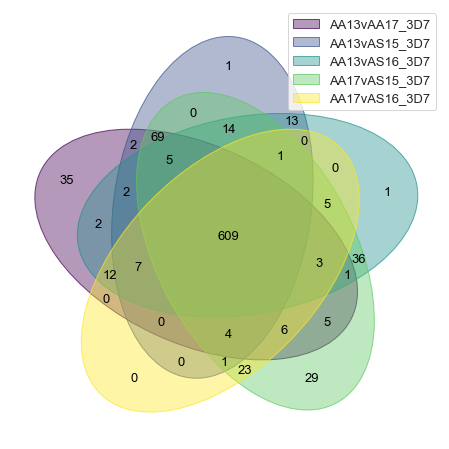

In [33]:
keys3D7 = ["AA13vAA17_3D7", "AA13vAS15_3D7", "AA13vAS16_3D7", "AA17vAS15_3D7", "AA17vAS16_3D7"]
vals3D7 = [orfs_AA13vAA17_3D7, orfs_AA13vAS15_3D7, orfs_AA13vAS16_3D7, orfs_AA17vAS15_3D7, orfs_AA17vAS16_3D7]

vennData3D7 = dict(zip(keys3D7, vals3D7)) 
sns.set(style="white")
venn(vennData3D7)

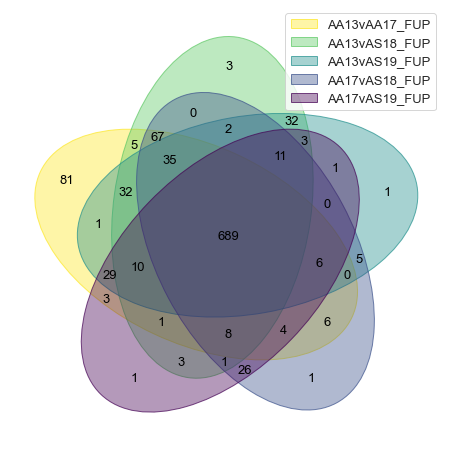

In [34]:
keysFUP = ["AA13vAA17_FUP", "AA13vAS18_FUP", "AA13vAS19_FUP", "AA17vAS18_FUP", "AA17vAS19_FUP"]
valsFUP = [orfs_AA13vAA17_FUP, orfs_AA13vAS18_FUP, orfs_AA13vAS19_FUP, orfs_AA17vAS18_FUP, orfs_AA17vAS19_FUP]
sns.set(style="white")
vennDataFUP = dict(zip(keysFUP, valsFUP)) 
venn(vennDataFUP, cmap='viridis_r')